# Imports

In [9]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Sequential API

In [3]:
def build_model_with_sequential():
    
    model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
    return model

# Functional API

In [4]:
def build_model_with_functional():
  input_layer = tf.keras.layers.Input(shape=(28, 28))
  x = tf.keras.layers.Flatten()(input_layer)
  x = tf.keras.layers.Dense(128, activation=tf.nn.relu)(x)
  output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(x)

  model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
  return model

# Build the model and visualize the model graph

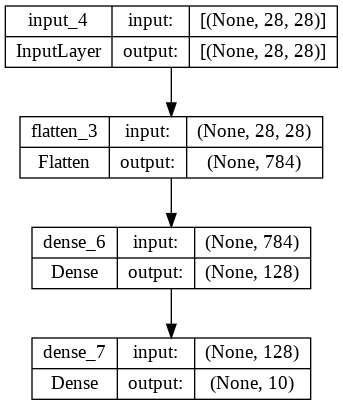

In [10]:
model = build_model_with_functional()

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

# Training the model

In [ ]:
# prepare fashion mnist dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

# configure, train, and evaluate the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)